In [1]:
import numpy as np
import skimage.io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab
import math

Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [2]:
img = skimage.io.imread('parrots.jpg')

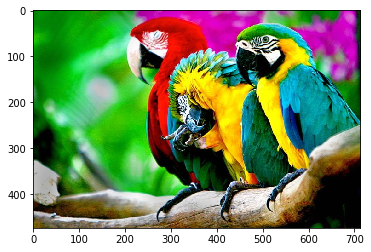

In [3]:
pylab.imshow(img)

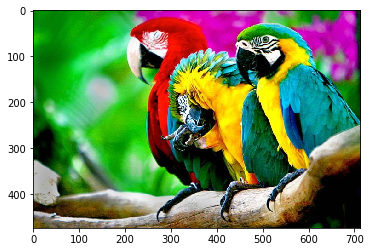

In [5]:
img_as_float = skimage.img_as_float(img)
pylab.imshow(img_as_float)

In [6]:
img_as_float.shape

(474, 713, 3)

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [7]:
r = img_as_float[:, :, 0].ravel()
g = img_as_float[:, :, 1].ravel()
b = img_as_float[:, :, 2].ravel()

rgb = np.transpose(np.vstack((r, g, b)))
print (rgb)

[[0.01568627 0.49411765 0.01960784]
 [0.01176471 0.49019608 0.01568627]
 [0.00784314 0.49411765 0.00784314]
 ...
 [0.02352941 0.09019608 0.11764706]
 [0.08235294 0.16078431 0.20392157]
 [0.08627451 0.15686275 0.23529412]]


Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

Измерьте качество получившейся сегментации с помощью метрики PSNR. 

Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [9]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = np.max(img1)
    return 10 * math.log10(PIXEL_MAX / mse)

In [12]:
def avg_img(n_clusters, img_as_float, model):
    labels = model.labels_
    colors_avg = model.cluster_centers_
    
    cl_img = np.reshape(labels, (-1, 713))
    img_new = np.copy(img_as_float)
    
    for cluster in range(0, n_clusters):
        img_new[cl_img == cluster] = colors_avg[cluster]
     
    return img_new

In [13]:
def median_img(n_clusters, img_as_float, model):
    labels = model.labels_
    img_new = np.copy(img_as_float)
    cl_img = np.reshape(labels, (-1, 713))
    
    for cluster in range(0, n_clusters):
        median_r = np.median(img_new[:, :, 0][cl_img == cluster])
        median_g = np.median(img_new[:, :, 1][cl_img == cluster])
        median_b = np.median(img_new[:, :, 2][cl_img == cluster])

    img_new[cl_img == cluster] = [median_r, median_g, median_b]

    return img_new

1 9.837758895356929
2 12.112019654208922
3 13.17599957940966
4 14.394273843996784
5 15.559897220528145
6 16.572718257798606
7 17.671909394314092
8 18.468103858660488
9 19.144820592833437
10 19.675444102637005
11 20.162061833554628
12 20.633510404862896
13 21.061266557050207
14 21.367527672070757
15 21.64497146341639
16 21.885104016011965
17 22.16580724869796
18 22.380218449826703
19 22.56948061621192
20 22.74919987382964


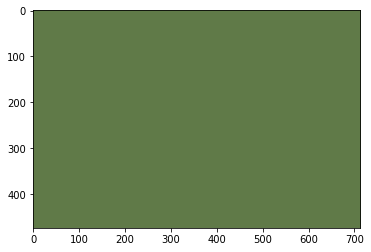

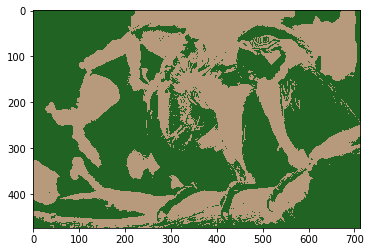

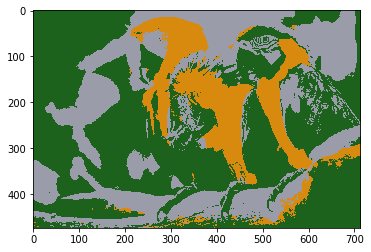

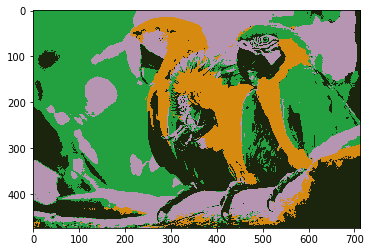

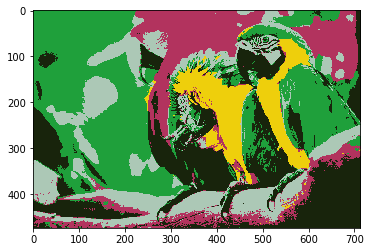

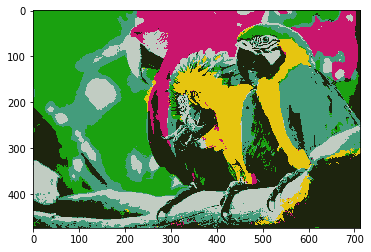

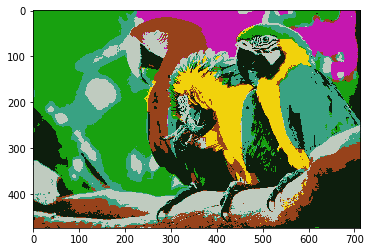

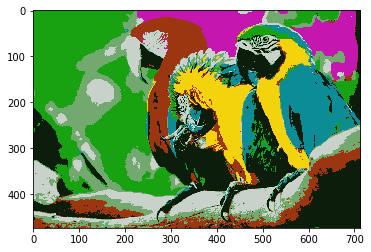

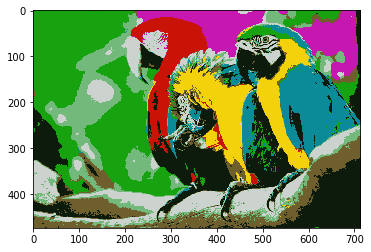

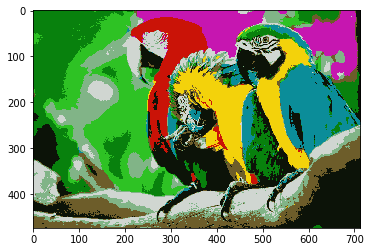

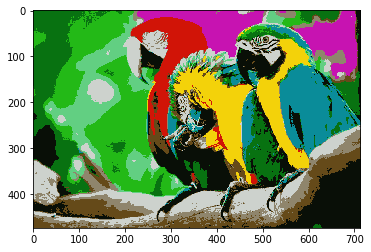

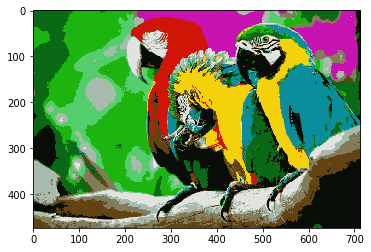

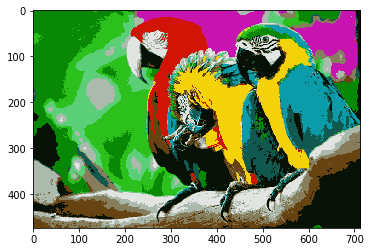

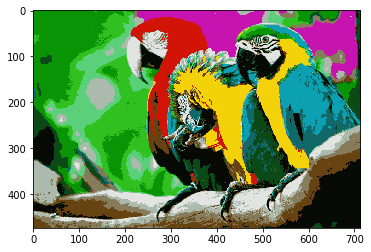

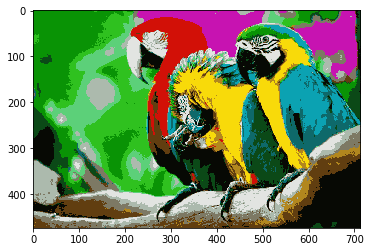

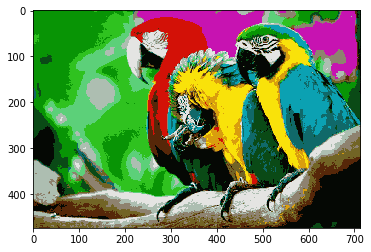

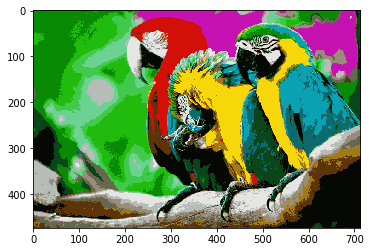

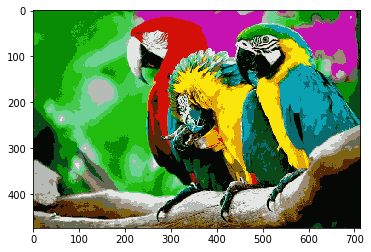

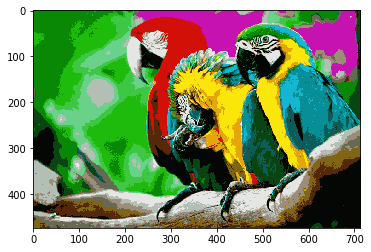

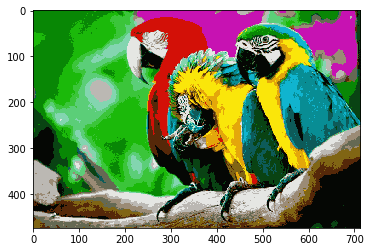

In [15]:
for n in range(1, 21):
    kmeans = KMeans(init='k-means++', random_state=241, n_clusters=n)
    clusts = kmeans.fit(rgb)
    img_new = avg_img(n, img_as_float, kmeans)

    print (n, psnr(img_as_float, img_new))
    plt.figure()
    plt.imshow(img_new)

1 9.460408259198367
2 15.23479928659895
3 20.895138082188744
4 19.200344175857495
5 22.844551188719993
6 22.872010855446355
7 25.63661968780652
8 28.84891259230715
9 29.02032632953133
10 28.352864583418736
11 29.470261747670857
12 29.72492292592426
13 32.078165123438154
14 31.09645472228477
15 33.9544720205813
16 35.015252980639474
17 34.44238284887588
18 34.8289319787317
19 35.583275843054885
20 36.43081689326158


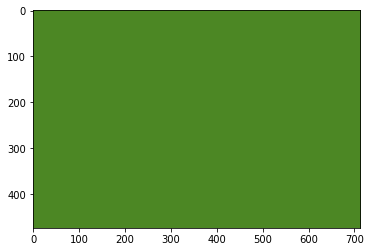

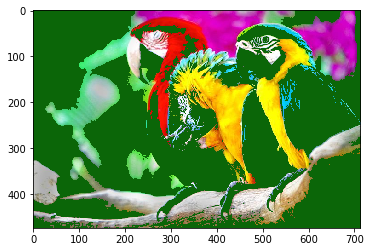

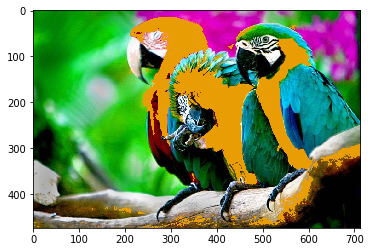

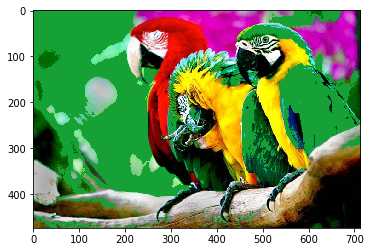

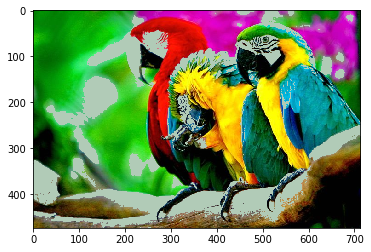

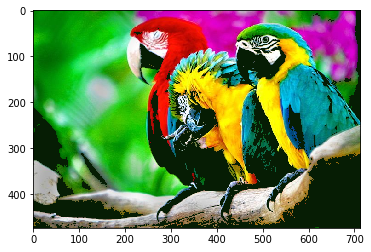

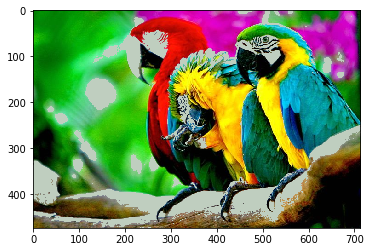

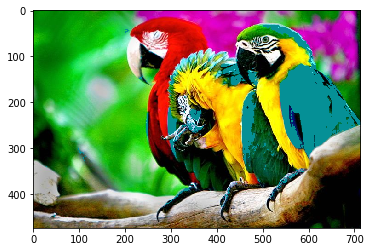

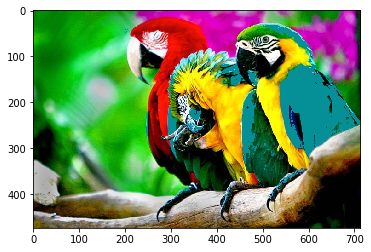

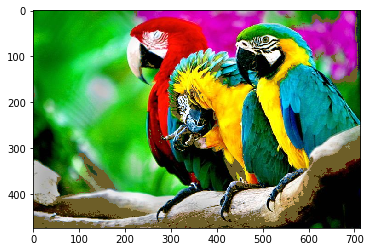

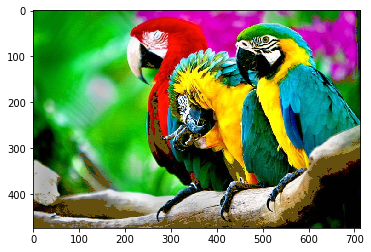

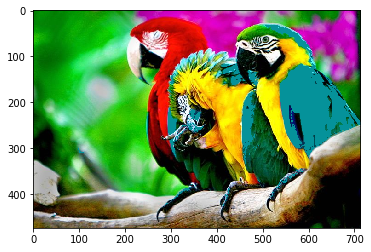

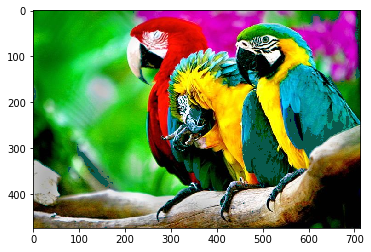

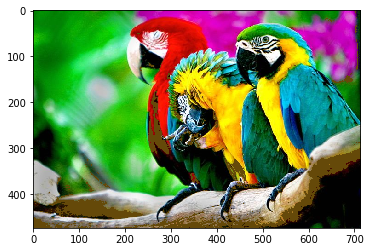

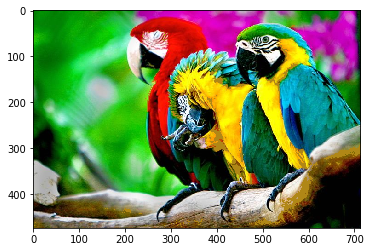

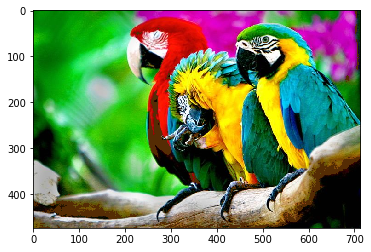

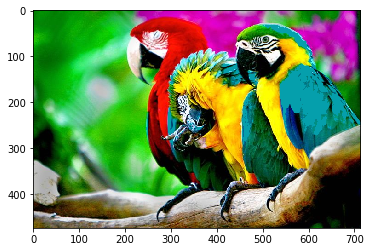

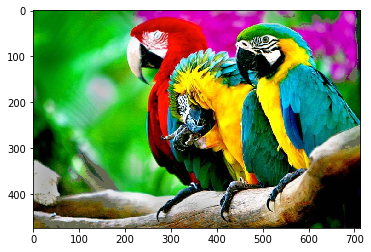

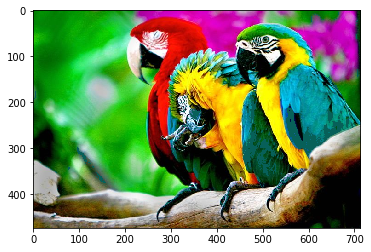

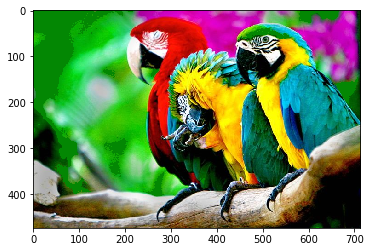

In [16]:
for n in range(1, 21):
    kmeans = KMeans(init='k-means++', random_state=241, n_clusters=n)
    clusts = kmeans.fit(rgb)
    img_new = median_img(n, img_as_float, kmeans)

    print (n, psnr(img_as_float, img_new))
    plt.figure()
    plt.imshow(img_new)